In [28]:
# load two csv files
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

book_info = pd.read_csv('../data/clean_data/clean_book_info.csv')
reviews_df = pd.read_csv('../data/clean_data/reviews_with_stress.csv')

# Frequency of words in reviews with stress (predicted_stress = 1)

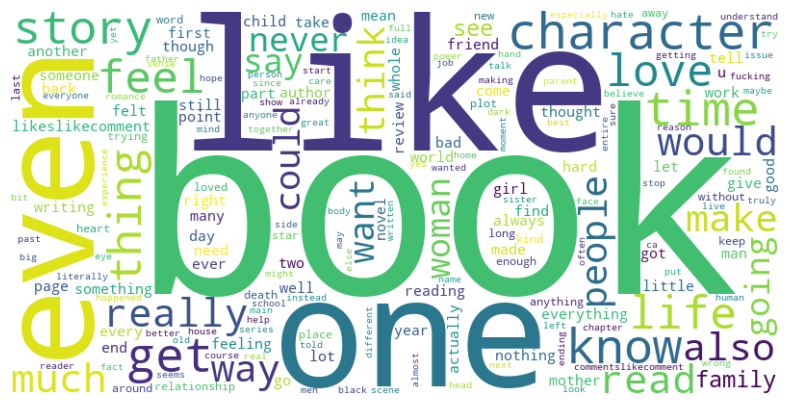

In [29]:
# filter the reviews stress=1
stress_reviews = reviews_df[reviews_df['predicted_stress'] == 1]['processed_text']

# calculate the frequency of words
words_in_stress_reviews = []
for review in stress_reviews:
    words_in_stress_reviews.extend(review.split())

word_counts_in_stress_reviews = Counter(words_in_stress_reviews)

# build a  wordcloud
wordcloud_stress = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_in_stress_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')
plt.show()


# Merge the book info data with the reviews data that includes predicted stress

In [30]:
# Merge the book info data with the reviews data that includes predicted stress
merged_review_data = pd.merge(reviews_df, book_info, on='title_id', how='left')
merged_review_data = merged_review_data.drop(columns=['title_y']).rename(columns={'title_x':'title'})
merged_review_data.head(3)

,Unnamed: 0,title_id,title,review_number,review,processed_text,predicted_stress,author,publish_date,pages,format,rating,rating_couunts,reviews_counts,votes,year,description,main_genre,is_bestseller,award
0,0,111,five feet apart,1,[3.5] There’s some disagreement within the CF ...,disagreement within cf community whether book ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
1,1,111,five feet apart,2,Edit: For the love of God I wrote this review ...,edit love god wrote review two year ago still ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
2,2,111,five feet apart,3,Can't say I'm surprised I didn't enjoy this bo...,ca say surprised enjoy book part goodreads rea...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019


In [31]:
merged_review_data.shape

(16860, 20)

In [32]:
merged_review_data.dtypes

Unnamed: 0            int64
title_id              int64
title                object
review_number         int64
review               object
processed_text       object
predicted_stress      int64
author               object
publish_date         object
pages               float64
format               object
rating              float64
rating_couunts       object
reviews_counts       object
votes                 int64
year                  int64
description          object
main_genre           object
is_bestseller         int64
award                object
dtype: object

In [33]:
merged_review_data.nunique()

Unnamed: 0          16860
title_id             1686
title                1686
review_number          10
review              16811
processed_text      16662
predicted_stress        2
author               1304
publish_date          404
pages                 416
format                  8
rating                132
rating_couunts       1672
reviews_counts       1577
votes                1606
year                    5
description          1686
main_genre              5
is_bestseller           2
award                  89
dtype: int64

In [34]:
merged_review_data.describe()

,Unnamed: 0,title_id,review_number,predicted_stress,pages,rating,votes,year,is_bestseller
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000
mean,8429.500000,3276.955516,5.500000,0.097331,345.276987,4.046459,14746.444840,2020.848161,0.254448
std,4867.207105,1165.380783,2.872367,0.296417,137.087111,0.266630,21161.583726,1.402702,0.435564
min,0.000000,111.000000,1.000000,0.000000,0.000000,3.160000,383.000000,2019.000000,0.000000
25%,4214.750000,2937.000000,3.000000,0.000000,273.000000,3.840000,2843.000000,2020.000000,0.000000
50%,8429.500000,3585.500000,5.500000,0.000000,338.000000,4.050000,7365.500000,2021.000000,0.000000
75%,12644.250000,4151.000000,8.000000,0.000000,406.000000,4.240000,19782.000000,2022.000000,1.000000
max,16859.000000,4697.000000,10.000000,1.000000,1242.000000,4.750000,397565.000000,2023.000000,1.000000


In [35]:
merged_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16860 non-null  int64  
 1   title_id          16860 non-null  int64  
 2   title             16860 non-null  object 
 3   review_number     16860 non-null  int64  
 4   review            16860 non-null  object 
 5   processed_text    16860 non-null  object 
 6   predicted_stress  16860 non-null  int64  
 7   author            16860 non-null  object 
 8   publish_date      16860 non-null  object 
 9   pages             16860 non-null  float64
 10  format            16860 non-null  object 
 11  rating            16860 non-null  float64
 12  rating_couunts    16860 non-null  object 
 13  reviews_counts    16860 non-null  object 
 14  votes             16860 non-null  int64  
 15  year              16860 non-null  int64  
 16  description       16860 non-null  object

In [36]:
# Group by genre and calculate the mean stress per genre
genre_stress_analysis = merged_review_data.groupby('genre')['predicted_stress'].mean().sort_values(ascending=False)

# Display the stress levels by book genre
genre_stress_analysis

KeyError: 'genre'